In [ ]:
import pandas as pd

# Load the datasets
ig_110 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/sorted_by_ig1030_time_cross_10.csv', sep='\t')
ig_120 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/sorted_by_ig1030_time_cross_20.csv', sep='\t')
ig_130 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/sorted_by_ig1030_time_cross_30.csv', sep='\t')
ig_140 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/sorted_by_ig1030_time_cross_40.csv', sep='\t')
ig_150 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/sorted_by_ig1030_time_cross_50.csv', sep='\t')
ig_160 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/sorted_by_ig1030_time_cross_60.csv', sep='\t')
ig_170 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/sorted_by_ig1030_time_cross_70.csv', sep='\t')
ig_180 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/sorted_by_ig1030_time_cross_80.csv', sep='\t')
ig_190 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/sorted_by_ig1030_time_cross_90.csv', sep='\t')
ig_1 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/sorted_by_ig1030_time_cross.csv', sep='\t')

# Extract the top 100 rows based on 'ig_1' from each DataFrame
top100_dfs = [df.nlargest(50, 'ig_1') for df in [ig_110, ig_120, ig_130, ig_140, ig_150, ig_160, ig_170, ig_180, ig_190, ig_1]]

# Create a dictionary to hold the count of reactions
reaction_count_dict = {df_name: top100_df['start'].tolist() for df_name, top100_df in zip(range(10), top100_dfs)}

# Prepare the summary DataFrame
reaction_summary = pd.DataFrame(index=pd.unique(pd.concat([df['start'] for df in top100_dfs])), columns=[f'{i+1} datasets' for i in range(10)])

# Initialize with zeros
reaction_summary.fillna(0, inplace=True)

# Count occurrences
for idx, df_reactions in reaction_count_dict.items():
    reaction_summary[f'{idx+1} datasets'] = reaction_summary.index.isin(df_reactions).astype(int)

# Display the summary
# print(reaction_summary.head(n=10))
reaction_summary['total_datasets'] = reaction_summary.sum(axis=1)

reaction_summary_sorted = reaction_summary.sort_values(by='total_datasets', ascending=False)

print(reaction_summary_sorted)

reaction_summary_sorted = reaction_summary_sorted.drop(columns=['total_datasets'])

               1 datasets  2 datasets  3 datasets  4 datasets  5 datasets  6 datasets  7 datasets  \
R-MMU-8956140           1           1           1           1           1           1           1   
R-MMU-1981128           1           1           1           1           1           1           1   
R-MMU-5686657           1           1           0           1           1           1           1   
R-MMU-3000310           1           1           1           1           1           1           1   
R-MMU-2990833           1           1           1           1           1           0           1   
R-MMU-1981120           1           1           1           1           1           1           1   
R-MMU-2993780           0           1           1           1           1           1           1   
R-MMU-114259            1           0           1           1           0           1           1   
R-MMU-380073            1           0           1           1           1           0      

In [ ]:
pd.set_option('display.max_rows', None)  # None means show all rows
pd.set_option('display.max_columns', None)  # None means show all columns

pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', 100)
print(reaction_summary)

               1 datasets  2 datasets  3 datasets  4 datasets  5 datasets  6 datasets  7 datasets  \
R-MMU-8956140           1           1           1           1           1           1           1   
R-MMU-5686685           1           0           1           0           1           1           0   
R-MMU-1981128           1           1           1           1           1           1           1   
R-MMU-5683801           1           1           1           0           1           1           0   
R-MMU-6799332           1           1           0           1           0           0           0   
R-MMU-1981120           1           1           1           1           1           1           1   
R-MMU-380073            1           0           1           1           1           0           1   
R-MMU-8956040           1           0           0           1           0           1           1   
R-MMU-5684052           1           1           1           0           0           0      

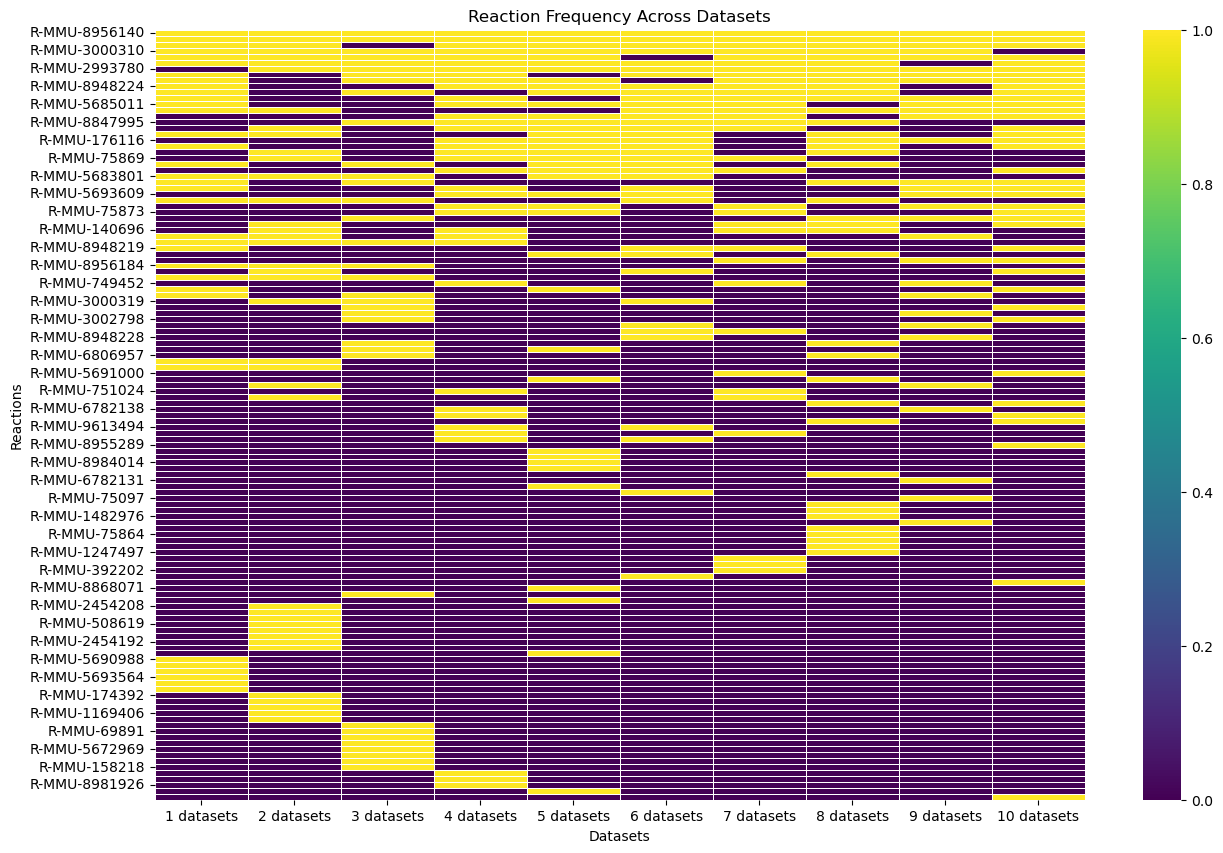

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

reaction_summary_sorted = reaction_summary_sorted.astype(bool)


plt.figure(figsize=(15, 10))  
sns.heatmap(reaction_summary_sorted, cmap='viridis', cbar=True, linewidths=.5)

plt.title('Reaction Frequency Across Datasets')
plt.xlabel('Datasets')
plt.ylabel('Reactions')

plt.show()
